In [2]:
#mounting the drive folder

import os
from google.colab import drive
from google.colab import files

train_path = "/content/gdrive/My Drive/Colab Notebooks/CS345_SP23/brain tumor MRI images/train"
Validation_path = "/content/gdrive/My Drive/Colab Notebooks/CS345_SP23/brain tumor MRI images/val"
folder_path = "/content/gdrive/My Drive/Colab Notebooks/CS345_SP23/brain tumor MRI images"

drive.mount('/content/gdrive/')
# os.chdir(PROJECT_FOLDER)
# print("Current dir: ", os.getcwd())

os.chdir(folder_path)
print("Current dir: ", os.getcwd())

Mounted at /content/gdrive/
Current dir:  /content/gdrive/My Drive/Colab Notebooks/CS345_SP23/brain tumor MRI images


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
#datset generator // building the data pipeline
dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=256,
    image_size=(128, 128),
    shuffle=True,
    seed=1234,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)



validation_set = tf.keras.utils.image_dataset_from_directory(
    Validation_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=256,
    image_size=(128, 128),
    shuffle=True,
    seed=1234,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False)




#(PROJECT_FOLDER, image_size=(64,64), batch_size = 16, )

Found 17863 files belonging to 3 classes.
Found 828 files belonging to 3 classes.


In [4]:
dataset = dataset.map(lambda x,y:(x/255,y))  #normalizing the training set
validation_set = validation_set.map(lambda x,y:(x/255,y)) #normalizing the validation set

In [5]:
dataset = dataset.cache()

In [ ]:
#allows to access the data pipeline
data_iter = dataset.as_numpy_iterator()
# accessing the data pipeline
batch = data_iter.next()



In [ ]:
batch[0][1] #dimmensions of an image

In [ ]:
batch[0].shape  #dimeensions of a batch

(200, 128, 128, 1)

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


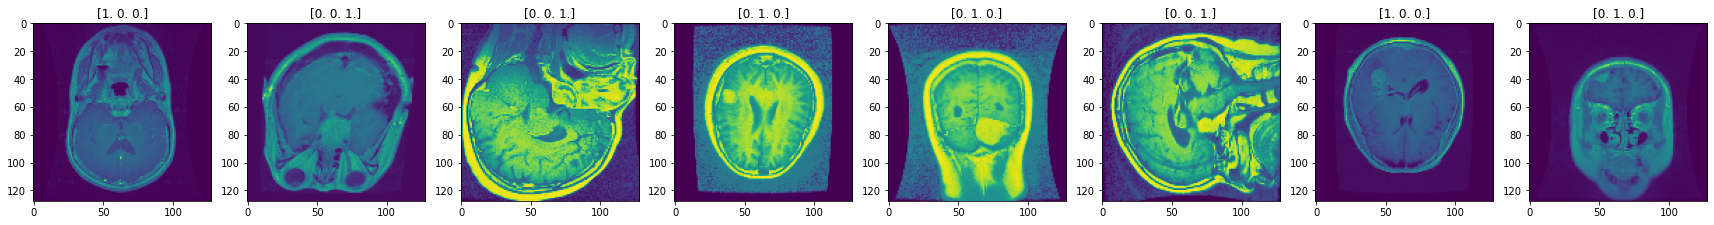

In [ ]:
# 8 first images from thee first batch

fig, axis = plt.subplots(ncols = 8, figsize = (30,30))


for id, img in enumerate(batch[0][:8]):
  axis[id].imshow(img)  #.astype(float)
  axis[id].title.set_text(batch[1][id])



In [ ]:
len(dataset)  #the number of batches in the dataset

70

In [ ]:
np.unique(dataset.as_numpy_iterator().next()[0])

### Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Proposed Model

In [ ]:
from keras.backend import batch_normalization
from keras.layers import BatchNormalization as BN
from keras.api._v2.keras import activations
model = Sequential()
pl = [2,2]

model.add(Conv2D(16, (5,5), strides = pl, activation = 'relu', input_shape = (128,128,1), padding = 'SAME'))
model.add(Conv2D(16, (3,3), strides = pl, activation = 'relu', padding = 'SAME'))

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2), activation = 'relu', padding = 'SAME'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2), activation = 'relu', padding = 'SAME'))

model.add(Conv2D(64, (2,2), activation = 'relu', padding = 'SAME'))

model.add(Flatten())


model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))


model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

# ELU model
:

In [13]:
from keras.backend import batch_normalization
from keras.layers import BatchNormalization as BN
from keras.api._v2.keras import activations
model = Sequential()
pl = [2,2]

model.add(Conv2D(16, (5,5), strides = pl, activation = 'elu', input_shape = (128,128,1), padding = 'SAME'))
model.add(Conv2D(16, (3,3), strides = pl, activation = 'elu', padding = 'SAME'))
model.add(BN())

model.add(Conv2D(32, (3,3), activation = 'elu', padding = 'SAME'))
model.add(BN())
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation = 'elu', padding = 'SAME'))
model.add(BN())
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2), activation = 'elu', padding = 'SAME'))
model.add(BN())

model.add(Conv2D(64, (2,2), activation = 'elu', padding = 'SAME'))
model.add(BN())

model.add(Flatten())


model.add(Dense(256, activation = 'elu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))


model.compile(tf.keras.optimizers.Adam(learning_rate=1e-2),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_15 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)      

In [ ]:
Conv2D??

# Relu Model

In [ ]:
Stochastic_gradient_decent()??

In [16]:
from keras.backend import batch_normalization
from keras.layers import BatchNormalization as BN
from keras.api._v2.keras import activations
model = Sequential()
pl = [2,2]

model.add(Conv2D(16, (5,5), strides = pl, activation = 'relu', input_shape = (128,128,1), padding = 'SAME'))
model.add(Conv2D(16, (3,3), strides = pl, activation = 'relu', padding = 'SAME'))
#model.add(BN())

model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'SAME'))
#model.add(BN())
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2), activation = 'relu', padding = 'SAME'))
#model.add(BN())
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2), activation = 'relu', padding = 'SAME'))
#model.add(BN())

model.add(Conv2D(64, (2,2), activation = 'relu', padding = 'SAME'))
#model.add(BN())

model.add(Flatten())


model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation = 'softmax'))


model.compile(tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 16)        416       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 32)        4128      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [11]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

To do:

increase batch size

change learning rate

number of filters

chage relu for elu

change image size

normalize the dataset




In [18]:
hist = model.fit(dataset, epochs = 20, validation_data = validation_set, callbacks = [tensorboard_callback])  #

Epoch 1/20
70/70 [==============================] - 2564s 37s/step - loss: 0.7988 - accuracy: 0.6221 - val_loss: 0.5890 - val_accuracy: 0.7343
Epoch 2/20
70/70 [==============================] - 4s 58ms/step - loss: 0.6105 - accuracy: 0.7288 - val_loss: 0.5086 - val_accuracy: 0.7778
Epoch 3/20
70/70 [==============================] - 7s 101ms/step - loss: 0.5281 - accuracy: 0.7687 - val_loss: 0.4500 - val_accuracy: 0.7874
Epoch 4/20
70/70 [==============================] - 4s 64ms/step - loss: 0.4563 - accuracy: 0.8003 - val_loss: 0.3742 - val_accuracy: 0.8370
Epoch 5/20
70/70 [==============================] - 4s 64ms/step - loss: 0.4037 - accuracy: 0.8238 - val_loss: 0.3477 - val_accuracy: 0.8466
Epoch 6/20
70/70 [==============================] - 5s 66ms/step - loss: 0.3444 - accuracy: 0.8535 - val_loss: 0.2924 - val_accuracy: 0.8889
Epoch 7/20
70/70 [==============================] - 4s 60ms/step - loss: 0.2991 - accuracy: 0.8732 - val_loss: 0.2653 - val_accuracy: 0.9034
Epoch 8/20

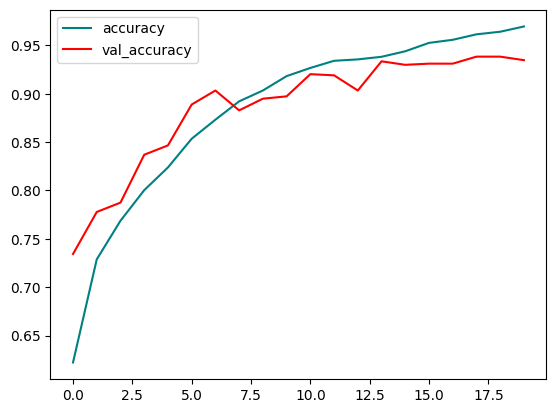

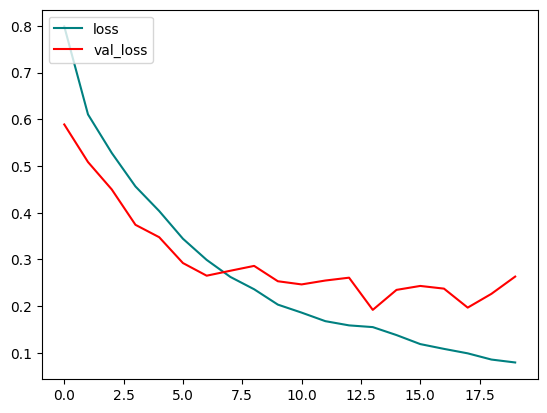

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'val_accuracy')
plt.legend(loc = "upper left")
plt.show()


fig1 = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')
plt.legend(loc = "upper left")
plt.show()

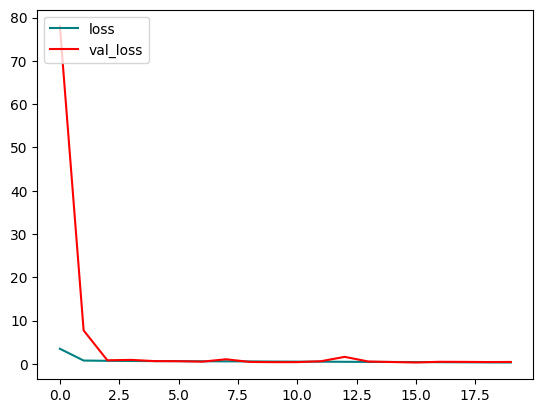

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')
plt.legend(loc = "upper left")
plt.show()

## Metrics

What to do:


1.   Rename the validation set as a testing set and use validation split in the fit method on the training set
2.   test on the decided metrics using the validation set (now renamed)
3. Consider these things in order to increase the speed or accuracy or both without changing the arcitecture:

      *   Increase batch size
      *   Change the optimizer to SGDM
      *   change the activation function to GELU









In [20]:
from tensorflow.keras.metrics import Accuracy, Precision, CategoricalAccuracy

precision = Precision()
accuracy = Accuracy()
cat_accuracy = CategoricalAccuracy()

In [21]:
for batch in validation_set.as_numpy_iterator():
  x,y = batch
  yhat =model.predict(x)
  precision.update_state(y,yhat)
  cat_accuracy.update_state(y,yhat)

2/2 [==============================] - 0s 164ms/step


In [22]:
print(f"Precision: {precision.result().numpy()},  Categorical Accuracy:{cat_accuracy.result().numpy()}")

Precision: 0.9347826242446899,  Categorical Accuracy:0.9347826242446899
